# Luiz Guedes EPAT Final Project 

In [ ]:
##Statistical Arbitrage - Pair Trading In the Brazilian Stock Market

In [1]:
import numpy as np
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import math
import os
import warnings

import statsmodels.tsa.vector_ar.vecm as vm
import statsmodels.formula.api as sm
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

# Set the Sectors

In [2]:
oil =  'RRRP3.SA CSAN3.SA DMMO3.SA ENAT3.SA RPMG3.SA PETR4.SA BRDT3.SA PRIO3.SA UGPA3.SA'
metal =  'BRAP4.SA CMIN3.SA MMXM3.SA VALE3.SA'
steel =  'FESA4.SA GGBR4.SA GOAU4.SA CSNA3.SA USIM3.SA'
paper =  'RANI3.SA KLBN4.SA MSPA4.SA SUZB3.SA'
transp_material =  'FRAS3.SA POMO4.SA RAPT4.SA RCSL4.SA RSUL4.SA TUPY3.SA MWET4.SA'
machines =  'SHUL4.SA WEGE3.SA EALT4.SA AERI3.SA BDLL4.SA ROMI3.SA INEP4.SA KEPL3.SA FRIO3.SA NORD3.SA'
rail_roads =  'RLOG3.SA VSPT3.SA RAIL3.SA'
highways =  'CCRO3.SA ECOR3.SA TPIS3.SA'
storage =  'PSVM11.SA STBP3.SA'
services =  'ATMP3.SA DTCY3.SA ALPK3.SA PRNR3.SA SEQL3.SA VLID3.SA'
agriculture =  'AGRO3.SA FRTA3.SA SLCE3.SA TESA3.SA'
meat =  'BRFS3.SA BAUH4.SA JBSS3.SA MRFG3.SA BEEF3.SA MNPR3.SA'
food =  'CAML3.SA JOPA4.SA MDIA3.SA ODER4.SA'
construction =  'AVLL3.SA CALI4.SA CRDE3.SA CURY3.SA CYRE3.SA DIRR3.SA EVEN3.SA EZTC3.SA GFSA3.SA HBOR3.SA JHSF3.SA JFEN3.SA LAVV3.SA MELK3.SA MTRE3.SA MDNE3.SA MRVE3.SA PDGR3.SA PLPL3.SA RDNI3.SA RSID3.SA TCSA3.SA TEND3.SA TRIS3.SA VIVR3.SA'
fabric =  'CEDO4.SA CTNM4.SA DOHL4.SA ECPR4.SA CTKA4.SA PTNT4.SA CTSA4.SA SGPS3.SA TEKA4.SA TXRX4.SA'
clothes_shoes =  'HGTX3.SA TFCO4.SA ALPA4.SA CAMB3.SA GRND3.SA VULC3.SA ARZZ3.SA CEAB3.SA CGRA4.SA SOMA3.SA GUAR3.SA LLIS3.SA AMAR3.SA LREN3.SA'
education =  'ANIM3.SA BAHI3.SA COGN3.SA CSED3.SA SEER3.SA YDUQ3.SA'
car_rental =  'RENT3.SA LCAM3.SA MOVI3.SA VAMO3.SA'
retail =  'ALLD3.SA MGLU3.SA VVAR3.SA BTOW3.SA CNTO3.SA ESPA3.SA LAME4.SA PETZ3.SA LJQQ3.SA SLED4.SA'
hospitals =  'AALR3.SA DASA3.SA FLRY3.SA HAPV3.SA PARD3.SA GNDI3.SA MATD3.SA ODPV3.SA QUAL3.SA RDOR3.SA'
drugstores =  'PNVL4.SA DMVF3.SA HYPE3.SA PGMN3.SA PFRM3.SA RADL3.SA'
it =  'BMOB3.SA ENJU3.SA LINX3.SA LWSA3.SA CASH3.SA MBLY3.SA MOSI3.SA NGRD3.SA SQIA3.SA TOTS3.SA WEST3.SA'
telecom =  'OIBR4.SA TELB4.SA VIVT3.SA TIMS3.SA'
electricity =  'AESB3.SA AFLT3.SA ALUP4.SA CBEE3.SA CEBR3.SA CEED4.SA EEEL4.SA CLSC4.SA GPAR3.SA CEPE3.SA CMIG4.SA CESP3.SA CEEB3.SA COCE3.SA CPLE3.SA CSRN3.SA CPFE3.SA EKTR4.SA ELET3.SA LIPR3.SA EMAE4.SA ENBR3.SA ENGI4.SA ENMT4.SA ENEV3.SA EGIE3.SA EQPA3.SA EQTL3.SA POWE3.SA GEPA4.SA LIGT3.SA NEOE3.SA OMGE3.SA REDE3.SA RNEW4.SA TAEE4.SA TRPL4.SA'
water =  'AMBP3.SA CASN4.SA CSMG3.SA ORVR3.SA SBSP3.SA SAPR4.SA'
banking =  'ABCB4.SA RPAD3.SA BRIV4.SA BAZA3.SA BMGB4.SA BIDI4.SA BPAN4.SA BGIP4.SA BEES4.SA BRSR3.SA BBDC4.SA BBAS3.SA BSLI4.SA BPAC3.SA ITSA4.SA ITUB4.SA BMEB4.SA BMIN4.SA BNBR3.SA PINE4.SA SANB4.SA'
securities =  ''
financial_services =  'PDTC3.SA PPLA11.SA B3SA3.SA BOAS3.SA CIEL3.SA CARD3.SA'
insurance =  'BRGE3.SA BBSE3.SA IRBR3.SA PSSA3.SA CSAB4.SA SULA4.SA APER3.SA WIZS3.SA'
real_estate =  'ALSO3.SA BRML3.SA BRPR3.SA CORR4.SA CCPR3.SA GSHP3.SA HBTS5.SA HBRE3.SA IGBR3.SA IGTA3.SA JPSA3.SA LOGG3.SA MULT3.SA SCAR3.SA BBRK3.SA LPSB3.SA'

sectorNames = [ 'oil', 'metal', 'steel', 'paper', 'transp_material', 'machines', 'rail_roads', 'highways', 'storage', 'services', 'agriculture', 'meat', 'food', 'construction', 'fabric', 'clothes_shoes', 'education', 'car_rental', 'retail', 'hospitals', 'drugstores', 'it', 'telecom', 'electricity', 'water', 'banking', 'financial_services', 'insurance', 'real_estate' ]
sectors = [ oil, metal, steel, paper, transp_material, machines, rail_roads, highways, storage, services, agriculture, meat, food, construction, fabric, clothes_shoes, education, car_rental, retail, hospitals, drugstores, it, telecom, electricity, water, banking, financial_services, insurance, real_estate ]

sectorTickers = { s[0]: s[1] for s in zip(sectorNames, sectors)}

print(sectorTickers)

{'oil': 'RRRP3.SA CSAN3.SA DMMO3.SA ENAT3.SA RPMG3.SA PETR4.SA BRDT3.SA PRIO3.SA UGPA3.SA', 'metal': 'BRAP4.SA CMIN3.SA MMXM3.SA VALE3.SA', 'steel': 'FESA4.SA GGBR4.SA GOAU4.SA CSNA3.SA USIM3.SA', 'paper': 'RANI3.SA KLBN4.SA MSPA4.SA SUZB3.SA', 'transp_material': 'FRAS3.SA POMO4.SA RAPT4.SA RCSL4.SA RSUL4.SA TUPY3.SA MWET4.SA', 'machines': 'SHUL4.SA WEGE3.SA EALT4.SA AERI3.SA BDLL4.SA ROMI3.SA INEP4.SA KEPL3.SA FRIO3.SA NORD3.SA', 'rail_roads': 'RLOG3.SA VSPT3.SA RAIL3.SA', 'highways': 'CCRO3.SA ECOR3.SA TPIS3.SA', 'storage': 'PSVM11.SA STBP3.SA', 'services': 'ATMP3.SA DTCY3.SA ALPK3.SA PRNR3.SA SEQL3.SA VLID3.SA', 'agriculture': 'AGRO3.SA FRTA3.SA SLCE3.SA TESA3.SA', 'meat': 'BRFS3.SA BAUH4.SA JBSS3.SA MRFG3.SA BEEF3.SA MNPR3.SA', 'food': 'CAML3.SA JOPA4.SA MDIA3.SA ODER4.SA', 'construction': 'AVLL3.SA CALI4.SA CRDE3.SA CURY3.SA CYRE3.SA DIRR3.SA EVEN3.SA EZTC3.SA GFSA3.SA HBOR3.SA JHSF3.SA JFEN3.SA LAVV3.SA MELK3.SA MTRE3.SA MDNE3.SA MRVE3.SA PDGR3.SA PLPL3.SA RDNI3.SA RSID3.SA TCSA3

# Read the Data

In [3]:
now = True

if now:
    startDate = datetime.date(2018, 1, 1)     
    start1 = startDate - pd.Timedelta(days=365)
    end1 = datetime.date(2021, 4, 30) + pd.Timedelta(days=1)
    endDate = end1 - pd.Timedelta(days=365) 
else:
    startDate = datetime.date(2009, 1, 1)     
    start1 = startDate - pd.Timedelta(days=366)
    end1 = datetime.date(2014, 12, 31) + pd.Timedelta(days=1)
    endDate = end1 - pd.Timedelta(days=365) 
    
what = 'Adj Close'
what = 'Close'

market_index = ['BOVA11.SA', 'IBOV11.SA']
filterTopStocks = True

checkADF = True

leverage = 1

useNegativePairs = True

longOnly = False

minSectorLen = 5
minPairCorrel = 0.0

riskFreeYearRet = 0.03
pairAmount = 1.0

debug = False
pairList = []

dataFolder = 'sector_data/'
if not os.path.exists(dataFolder):
    os.makedirs(dataFolder)

print('Loading Sectors data:')    
print()

dfIndex = None
allSectors = dict(sectorTickers, **{ 'index' : market_index })
sectorsDataDic = {}
for sector in allSectors:    
    tickers = allSectors[sector]

    print(f'Loading {sector} sector data...')    
    
    dataName = dataFolder+'BR {} data {} {}.csv'.format(sector, start1.strftime('%Y-%m-%d'), end1.strftime('%Y-%m-%d'))
    if not os.path.exists(dataName):

        dfa = yf.download(tickers, start=start1, end=end1, interval='1d') #, group_by="ticker" )

        df = dfa[what].copy()

        df.to_csv(dataName, index=True, header=True)

    df = pd.read_csv(dataName, header=0,
                          index_col=0,
                          parse_dates=True)     

    if sector in sectorTickers:
        sectorsDataDic[sector] = df
    else:
        dfIndex = df
    

Loading Sectors data:

Loading oil sector data...
Loading metal sector data...
Loading steel sector data...
Loading paper sector data...
Loading transp_material sector data...
Loading machines sector data...
Loading rail_roads sector data...
Loading highways sector data...
Loading storage sector data...
Loading services sector data...
Loading agriculture sector data...
Loading meat sector data...
Loading food sector data...
Loading construction sector data...
Loading fabric sector data...
Loading clothes_shoes sector data...
Loading education sector data...
Loading car_rental sector data...
Loading retail sector data...
Loading hospitals sector data...
Loading drugstores sector data...
Loading it sector data...
Loading telecom sector data...
Loading electricity sector data...
Loading water sector data...
Loading banking sector data...
Loading financial_services sector data...
Loading insurance sector data...
Loading real_estate sector data...
Loading index sector data...


# Dealing with Survivorship Bias

In [4]:

sectorsDataOk = {}
sectorsTickersOk = {}    

top80PercTickers = 'ABEV3.SA AZUL4.SA BTOW3.SA B3SA3.SA BBSE3.SA BRML3.SA BBDC3.SA BBDC4.SA BRAP4.SA BBAS3.SA BRKM5.SA BRFS3.SA BPAC11.SA CRFB3.SA CCRO3.SA CMIG4.SA HGTX3.SA CIEL3.SA COGN3.SA CPLE6.SA CSAN3.SA CPFE3.SA CVCB3.SA CYRE3.SA ECOR3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA ENGI11.SA ENEV3.SA EGIE3.SA EQTL3.SA EZTC3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA NTCO3.SA HAPV3.SA HYPE3.SA IGTA3.SA GNDI3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA JHSF3.SA KLBN11.SA RENT3.SA LCAM3.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA BEEF3.SA MRVE3.SA MULT3.SA PCAR3.SA PETR3.SA PETR4.SA BRDT3.SA PRIO3.SA QUAL3.SA RADL3.SA RAIL3.SA SBSP3.SA SANB11.SA CSNA3.SA SULA11.SA SUZB3.SA TAEE11.SA VIVT3.SA TIMS3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VVAR3.SA WEGE3.SA YDUQ3.SA'
top100Tickers = 'ABEV3.SA ALPA4.SA ALUP11.SA AMAR3.SA ARZZ3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BEEF3.SA BIDI11.SA BIDI4.SA BPAC11.SA BPAN4.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRSR6.SA BTOW3.SA CESP6.SA CMIG3.SA CMIG4.SA CPFE3.SA CPLE6.SA CRFB3.SA CSAN3.SA CSMG3.SA CSNA3.SA CVCB3.SA CYRE3.SA DTEX3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENAT3.SA ENBR3.SA ENEV3.SA ENGI11.SA EQTL3.SA FLRY3.SA GFSA3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA ITSA4.SA ITUB4.SA JBSS3.SA JHSF3.SA KLBN11.SA LAME3.SA LAME4.SA LCAM3.SA LIGT3.SA LINX3.SA LOGG3.SA LREN3.SA LWSA3.SA MEAL3.SA MGLU3.SA MOVI3.SA MRFG3.SA MRVE3.SA MULT3.SA MYPK3.SA NTCO3.SA PETR3.SA PETR4.SA POMO4.SA PRIO3.SA PSSA3.SA QUAL3.SA RADL3.SA RAPT4.SA RENT3.SA SANB11.SA SBSP3.SA SLCE3.SA SMLS3.SA SMTO3.SA SUZB3.SA TAEE11.SA TEND3.SA TIET11.SA TOTS3.SA TRPL4.SA TUPY3.SA UGPA3.SA USIM5.SA VALE3.SA VVAR3.SA WEGE3.SA'
top100Ticker3Yrs = 'ABEV3.SA ALPA4.SA ALSO3.SA ALUP11.SA AMAR3.SA ARZZ3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BEEF3.SA BIDI11.SA BIDI4.SA BPAC11.SA BPAN4.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BRSR6.SA BTOW3.SA CCRO3.SA CESP6.SA CIEL3.SA CMIG3.SA CMIG4.SA CNTO3.SA COGN3.SA CPFE3.SA CPLE6.SA CRFB3.SA CSAN3.SA CSMG3.SA CSNA3.SA CVCB3.SA CYRE3.SA DTEX3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENAT3.SA ENBR3.SA ENEV3.SA ENGI11.SA EQTL3.SA EZTC3.SA FLRY3.SA GFSA3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA JHSF3.SA KLBN11.SA LAME3.SA LAME4.SA LCAM3.SA LIGT3.SA LINX3.SA LOGG3.SA LREN3.SA LWSA3.SA MDIA3.SA MEAL3.SA MGLU3.SA MOVI3.SA MRFG3.SA MRVE3.SA MULT3.SA MYPK3.SA NEOE3.SA NTCO3.SA ODPV3.SA PCAR3.SA PETR3.SA PETR4.SA POMO4.SA PRIO3.SA PSSA3.SA QUAL3.SA RADL3.SA RAIL3.SA RAPT4.SA RENT3.SA SANB11.SA SAPR11.SA SBSP3.SA SEER3.SA SLCE3.SA SMLS3.SA SMTO3.SA SULA11.SA SUZB3.SA TAEE11.SA TEND3.SA TIET11.SA TIMS3.SA TOTS3.SA TRPL4.SA TUPY3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT3.SA VLID3.SA VVAR3.SA WEGE3.SA WIZS3.SA YDUQ3.SA'

topTickers = top100Ticker3Yrs.split(' ') if now and filterTopStocks else None

for sector in sectorTickers:    

    df = sectorsDataDic[sector]
    #print(df.head())

    df = df.fillna(method='ffill')

    df = df.dropna(axis=1)
    #print(df.head())

    if topTickers is not None:
        sTickers = list(df.columns)
    
        for ticker in sTickers:
            if ticker not in topTickers:
                df.drop(ticker, axis=1, inplace=True)
    
    sTickers = list(df.columns)
    
    if len(sTickers) >= minSectorLen:

        sectorsDataOk[sector] = df       
        sectorsTickersOk[sector] = sTickers
    
        print(f"{sector} = ", "'{}'".format(' '.join(sTickers)))
    

oil =  'CSAN3.SA ENAT3.SA PETR4.SA PRIO3.SA UGPA3.SA'
construction =  'CYRE3.SA EZTC3.SA GFSA3.SA JHSF3.SA MRVE3.SA TEND3.SA'
clothes_shoes =  'ALPA4.SA AMAR3.SA ARZZ3.SA HGTX3.SA LREN3.SA'
electricity =  'CMIG4.SA CPFE3.SA EGIE3.SA ELET3.SA ENBR3.SA ENEV3.SA EQTL3.SA LIGT3.SA TRPL4.SA'
banking =  'BBAS3.SA BBDC4.SA BPAN4.SA ITSA4.SA ITUB4.SA'


# Calulate Pairs Correlation

In [5]:
def calcSectorCorrelations(sector):
    
    df = sectorsDataOk[sector].loc[startDate:endDate]
    cols = list(df.columns)
    n = len(cols)
    
    sectorCorr = {}
    
    print(f'Calculating {sector} pairs correlations...')
    for i in range(n-1):
        for j in range(i+1, n):
            
            pair = (cols[i], cols[j])
            
            corr = df[cols[i]].corr(df[cols[j]])
            
            if abs(corr) >= minPairCorrel:
                sectorCorr[pair] = corr

            #print(pair, f'corr: {sectorCorr[pair]:.4f}')

    return sectorCorr


sectorsCorrDic = {}

sectorQty = 0
pairQty = 0
for sector in sectorsDataOk:    
    sectorCorrDic = calcSectorCorrelations(sector)
    
    #print(f"{sector} correlations = ", sectorCorrDic)
    print(f"{sector} correlations: ")
    
    pairs = sectorCorrDic.keys()
    corrs = sectorCorrDic.values()

    corrSorted = sorted(zip(corrs,pairs), reverse=True)
    sectorsCorrDic[sector] = corrSorted
    
    sectorQty += 1
    for corr in corrSorted:
        print( f'{corr[1]}: {corr[0]:.4f}')
        pairQty += 1

print()        
print('sectors:', sectorQty)
print('pairs:', pairQty)

Calculating oil pairs correlations...
oil correlations: 
('CSAN3.SA', 'PRIO3.SA'): 0.9107
('PETR4.SA', 'PRIO3.SA'): 0.5383
('ENAT3.SA', 'PETR4.SA'): 0.5144
('ENAT3.SA', 'PRIO3.SA'): 0.5075
('CSAN3.SA', 'PETR4.SA'): 0.4679
('CSAN3.SA', 'ENAT3.SA'): 0.3628
('ENAT3.SA', 'UGPA3.SA'): -0.0681
('PETR4.SA', 'UGPA3.SA'): -0.0841
('CSAN3.SA', 'UGPA3.SA'): -0.1615
('PRIO3.SA', 'UGPA3.SA'): -0.2682
Calculating construction pairs correlations...
construction correlations: 
('EZTC3.SA', 'JHSF3.SA'): 0.9828
('CYRE3.SA', 'EZTC3.SA'): 0.9640
('CYRE3.SA', 'JHSF3.SA'): 0.9404
('EZTC3.SA', 'TEND3.SA'): 0.9393
('JHSF3.SA', 'TEND3.SA'): 0.9351
('CYRE3.SA', 'TEND3.SA'): 0.9234
('CYRE3.SA', 'MRVE3.SA'): 0.9214
('EZTC3.SA', 'MRVE3.SA'): 0.8538
('MRVE3.SA', 'TEND3.SA'): 0.8448
('JHSF3.SA', 'MRVE3.SA'): 0.8240
('CYRE3.SA', 'GFSA3.SA'): -0.4102
('GFSA3.SA', 'JHSF3.SA'): -0.4328
('GFSA3.SA', 'MRVE3.SA'): -0.4493
('EZTC3.SA', 'GFSA3.SA'): -0.4654
('GFSA3.SA', 'TEND3.SA'): -0.5642
Calculating clothes_shoes pairs co

# Calculate Pairs Cointegration

In [6]:
   
sigPos = { 90: 0, 95: 1, 99: 2 } 

significance=90

def calcCointegration(df, pair, significance=99 ):
    
    # Combine the two time series into a matrix y2 for input into Johansen test
    y2=pd.concat([df[pair[0]], df[pair[1]]], axis=1)
    y2=y2.loc[y2.notnull().all(axis=1),]

    if (y2.shape[0] > 240):
        # Johansen test
        result=vm.coint_johansen(y2.values, det_order=0, k_ar_diff=1)
        isCoint = (result.lr1[0] > result.cvt[0, sigPos[significance]])
        if False: #isCoint: 
            print( pair )
            print(result.lr1)
            print(result.cvt)
            print(result.evec)    
            print()
    else:
        isCoint = False

    return isCoint, result

def cointRel(result, significance=99):
    return result.lr1[0] / result.cvt[0, sigPos[significance]]

sectorsCointPairs = {}

for sector in sectorsDataOk:    
    
    print(f'Calculating {sector} pairs cointegrations...')
    
    df = sectorsDataOk[sector].loc[:endDate]
    
    corrs = sectorsCorrDic[sector]
    
    sectorCointPairs = []
    for corrPair in corrs:
        isCoint, result = calcCointegration(df, corrPair[1], significance)
        if isCoint:
            sectorCointPairs.append((corrPair[1], result))
            
    if len(sectorCointPairs) > 0:
        sectorsCointPairs[sector] = sectorCointPairs
    

sectorsCointPairsSorted = {}    
for sector in sectorsCointPairs:    
    
    print( f'Sorting sector {sector}...')    
    
    sectorsCointPairsSorted[sector] = sorted(sectorsCointPairs[sector], key=lambda x: cointRel(x[1], significance), reverse=True)

sectorQty = 0
pairQty = 0
lastPairQty = 0
for sector in sectorsCointPairs:    
    print( f'{sector}:')        
    for pair, result in sectorsCointPairsSorted[sector]:
        #print( f'{pair}\n{result.evec}')
        #print( f'{pair}\n{result.evec[:,0]}')
        #print( f'{pair} [{result.evec[0][0]:.4f}, {result.evec[1][0]:.4f}]')
        rel = result.evec[0][0]/result.evec[1][0]
        if rel >= 0:
            print( f'{pair[0]} + {rel:.4f} * {pair[1]}')
        else:
            print( f'{pair[0]} - {-rel:.4f} * {pair[1]}')            
        pairQty += 1
        
    if lastPairQty != pairQty:
        lastPairQty = pairQty
        sectorQty += 1
        
print()        
print('sectors:', sectorQty)
print('pairs:', pairQty)    

Calculating oil pairs cointegrations...
Calculating construction pairs cointegrations...
Calculating clothes_shoes pairs cointegrations...
Calculating electricity pairs cointegrations...
Calculating banking pairs cointegrations...
Sorting sector oil...
Sorting sector construction...
Sorting sector clothes_shoes...
Sorting sector electricity...
Sorting sector banking...
oil:
ENAT3.SA - 2.7789 * PRIO3.SA
construction:
CYRE3.SA - 0.4554 * MRVE3.SA
MRVE3.SA - 3.7629 * TEND3.SA
JHSF3.SA - 1.3316 * MRVE3.SA
EZTC3.SA - 0.2183 * MRVE3.SA
EZTC3.SA - 0.1550 * JHSF3.SA
clothes_shoes:
AMAR3.SA - 8.0404 * HGTX3.SA
ARZZ3.SA - 1.1497 * HGTX3.SA
electricity:
EGIE3.SA - 1.1079 * ELET3.SA
CMIG4.SA - 3.3143 * EGIE3.SA
CMIG4.SA - 3.6280 * ELET3.SA
EGIE3.SA - 0.3271 * ENBR3.SA
ELET3.SA - 0.3382 * TRPL4.SA
CMIG4.SA - 1.5362 * CPFE3.SA
ENBR3.SA - 1.5174 * EQTL3.SA
CPFE3.SA - 0.6550 * ENBR3.SA
ENBR3.SA - 1.1633 * TRPL4.SA
banking:
BBAS3.SA - 0.5770 * BBDC4.SA
ITSA4.SA - 2.5956 * ITUB4.SA
BBDC4.SA - 0.7836 * B

# Calculate Pairs Spread and Beta

In [7]:
                        
dfI = dfIndex['BOVA11.SA'].loc[startDate:endDate]
indexVariance = dfI.var()

sectorQty = 0
pairQty = 0
lastPairQty = 0

pairSpreadData = {}   
pairSpreadBeta = {}
for sector in sectorsCointPairs:    
    
    df = sectorsDataOk[sector]
    
    print( f'Calculating spreads for sector {sector}...')        
    for pair, result in sectorsCointPairsSorted[sector]:

        rel = result.evec[0][0]/result.evec[1][0]
        
        dfSpread = df[pair[0]] + rel * df[pair[1]]
        
        dfSpread = pd.DataFrame(dfSpread, columns=['spread'])
        dfSpread['neg'] = dfSpread.apply(lambda y: 1 if y['spread'] < 0 else 0, axis=1 )
        dfSpread['pos'] = dfSpread.apply(lambda y: 1 if y['spread'] > 0 else 0, axis=1 )
        
        allPositive = dfSpread['neg'].sum() == 0
        allNegative = dfSpread['pos'].sum() == 0
        
        if ( allPositive or 
           ( allNegative and useNegativePairs)):

            if allNegative and useNegativePairs:
                pairSpreadData[pair] = -dfSpread
            else:
                pairSpreadData[pair] = dfSpread

            pairSpreadData[pair][pair[0]] = df[pair[0]]
            pairSpreadData[pair][pair[1]] = df[pair[1]]

            beta = dfI.cov(dfSpread.loc[startDate:endDate, 'spread'])/indexVariance

            pairSpreadBeta[pair] = beta

            print(pair, f'beta={beta:5.2f}')
            
            pairQty += 1
        
    if lastPairQty != pairQty:
        lastPairQty = pairQty
        sectorQty += 1
        
print()        
print('sectors:', sectorQty)
print('pairs:', pairQty)    


Calculating spreads for sector oil...
Calculating spreads for sector construction...
('CYRE3.SA', 'MRVE3.SA') beta= 0.38
('MRVE3.SA', 'TEND3.SA') beta=-1.52
('JHSF3.SA', 'MRVE3.SA') beta=-0.19
('EZTC3.SA', 'MRVE3.SA') beta= 0.77
('EZTC3.SA', 'JHSF3.SA') beta= 0.80
Calculating spreads for sector clothes_shoes...
('AMAR3.SA', 'HGTX3.SA') beta=-3.53
('ARZZ3.SA', 'HGTX3.SA') beta=-0.08
Calculating spreads for sector electricity...
('CMIG4.SA', 'EGIE3.SA') beta=-1.68
('CMIG4.SA', 'ELET3.SA') beta=-2.32
('EGIE3.SA', 'ENBR3.SA') beta= 0.49
('ELET3.SA', 'TRPL4.SA') beta= 0.61
('CMIG4.SA', 'CPFE3.SA') beta=-0.35
('ENBR3.SA', 'EQTL3.SA') beta=-0.19
('CPFE3.SA', 'ENBR3.SA') beta= 0.21
('ENBR3.SA', 'TRPL4.SA') beta=-0.05
Calculating spreads for sector banking...
('BBAS3.SA', 'BBDC4.SA') beta= 0.41
('ITSA4.SA', 'ITUB4.SA') beta=-0.47
('BBAS3.SA', 'ITUB4.SA') beta= 0.49

sectors: 4
pairs: 18


# Calculate Pairs Halflife

In [8]:

masxHalflife = 60

sectorQty = 0
pairQty = 0
lastPairQty = 0

pairSpreadHalflife = {}                        
for sector in sectorsCointPairs:    
        
    print( f'{sector}:')        
    for pair, result in sectorsCointPairsSorted[sector]:

        if pair in pairSpreadData:
            dfa = pairSpreadData[pair]
            df = pairSpreadData[pair].loc[startDate:endDate]

            yport=df['spread']
            ylag=yport.shift()
            deltaY=yport-ylag
            df2=pd.concat([ylag, deltaY], axis=1)
            df2.columns=['ylag', 'deltaY']
            regress_results=sm.ols(formula="deltaY ~ ylag", data=df2).fit() # Note this can deal with NaN in top row
            #print(regress_results.params)

            halflife=-np.log(2)/regress_results.params['ylag']

            #  Apply a simple linear mean reversion strategy to EWA-EWC-IGE
            lookback=np.round(halflife).astype(int) #  setting lookback to the halflife found above
            if lookback < 0:
                #print(pair, 'halflife=%.2f days' % halflife)
                #print(pair, 'halflife < 0!!!!!!!!!!!!!!!!!!!!')
                lookback = -lookback
            else:
                if lookback <= masxHalflife:
                    print(pair, 'halflife=%.2f days' % halflife)
                    pairSpreadHalflife[pair] = lookback
            
                    pairQty += 1
        
    if lastPairQty != pairQty:
        lastPairQty = pairQty
        sectorQty += 1
        
print()        
print('sectors:', sectorQty)
print('pairs:', pairQty)    
                    

oil:
construction:
('JHSF3.SA', 'MRVE3.SA') halflife=34.31 days
clothes_shoes:
('ARZZ3.SA', 'HGTX3.SA') halflife=41.97 days
electricity:
('CMIG4.SA', 'CPFE3.SA') halflife=56.65 days
('CPFE3.SA', 'ENBR3.SA') halflife=43.98 days
('ENBR3.SA', 'TRPL4.SA') halflife=32.18 days
banking:

sectors: 3
pairs: 5


# Bollinger Band Statistical Arbitrage Strategy

In [9]:

adfSignificance = 90

sigAdfPos = { 90: '10%', 95: '5%', 99: '1%' } 


def adfValCond1(s, td, pd, adfDays):
   
    if pd > td:
        pd = 0
        
    for ad in adfDays:
        
        if ad > pd and ad <= td:
            #print( f's={s:.2f} ad={ad}, pd={pd}, td={td}')
            return s 

    return 0.0

def adfVal(w):
    x = adfuller(w, maxlag = 1)

    return x[0]-x[4][sigAdfPos[adfSignificance]]

def adfValPos(w, l, df, adfLen):
    
    l = int(l)

    if l >= adfLen-1:
        x = adfuller(df.iloc[l-adfLen+1:l+1][w], maxlag = 1)

        adf = x[0]-x[4][sigAdfPos[adfSignificance]]
        #print('adf', adf)

        return adf

    return 0.0

def adfValCond(w, l, df, adfDays, adfLen):
    
    l = int(l)

    td = df.iloc[l]['day']
    pd = df.iloc[l-1]['day'] if l > 0 else td
    if pd > td:
        pd = 0
        
    for ad in adfDays:
        
        if ad > pd and ad <= td:

            #print( f'ad={ad}, pd={pd}, td={td}')

            if l >= adfLen-1:
                x = adfuller(df.iloc[l-adfLen+1:l+1][w], maxlag = 1)

                adf = x[0]-x[4][sigAdfPos[adfSignificance]]
                #print('adf', adf)
                
                return adf

    return 0.0


def calcQtyBalAmt(df, index, prev, price, position, spread):
       
    qty = df.loc[prev]['trade_qty'] 
    balance = df.loc[prev]['balance']

    if price > 0.0:
        if position > 0:   
            if qty == 0.0: # opening a long position - ok
                qty = leverage * balance / price
                df.loc[index, 'trade_qty'] = qty
                balance -= qty * price 
            else: # closing a short position and opening a long position at once
                qty = -qty
                balance -= price * qty                   
                qty = leverage * balance / price                    
                df.loc[index, 'trade_qty'] = qty
                balance -= price * qty                                       
        elif position == 0: # closing a short position - ok
            balance -= -price * qty
            qty = 0
            df.loc[index, 'trade_qty'] = qty
            
        else: # error!!!
            pass
        
    elif price == 0.0:
        df.loc[index, 'trade_qty'] = qty # df.loc[prevIndex, 'trade_qty2']
        
    elif price < 0.0:
        if position == 0: # closing a long position - ok
            balance += -price * qty
            qty = 0
            df.loc[index, 'trade_qty'] = qty
        elif position < 0: # opening a short position - ok
            if qty == 0.0:
                qty = leverage * balance / price
                df.loc[index, 'trade_qty'] = qty
                balance += price * qty
            else: # closing a long  position and opening a short position at once
                qty = -qty
                balance += 2 * price * qty
                df.loc[index, 'trade_qty'] = qty
                
        else: # error!!!
            pass

    df.loc[index, 'balance'] = balance
    df.loc[index, 'position_amt'] = price * qty / leverage if position > 0 else balance if position == 0 else balance/(1+leverage)
    df.loc[index, 'mtm_amt'] = spread * qty / leverage if position > 0 else balance if position == 0 else price*qty-(leverage*qty*(spread+price))
    

def stat_arb(df, what, lookback, std_dev, start=None, end=None, adfDays=[], adfLen=252):
    
    startIsNone = start is None    
    if start is None:
        start = df.index[0]
    else:
        start = df.loc[start:].index[0]

    if end is None: 
        end = df.index[-1]
    else:
        end = df.loc[:end].index[-1]
        
        
    df['moving_average'] = df[what].rolling(lookback).mean()
    df['moving_std_dev'] = df[what].rolling(lookback).std()

    df['upper_band'] = df.moving_average + std_dev*df.moving_std_dev
    df['lower_band'] = df.moving_average - std_dev*df.moving_std_dev
    
    df['moving_avg_prev'] = df['moving_average'].shift(1)
    df['upper_band_prev'] = df['upper_band'].shift(1)
    df['lower_band_prev'] = df['lower_band'].shift(1)
    
    df['date']=[ d for d in list(df.index) ]
    prev_date = [df.index[0]] + [ d for d in list(df.index[:-1]) ]
    df['prev_date']=prev_date               

    if checkADF:

        df['day']=[ d.day for d in list(df.index) ]
        
        if False:
            prev_day = [0] + [ d.day for d in list(df.index[:-1]) ]
            df['prev_day']=prev_day               
            df['adf_score'] = df[what].rolling(window=adfTestWindowLen).apply(lambda x: adfVal(x))
            df['adf_score_cond'] = df[['adf_score', 'day', 'prev_day']].apply(lambda x: adfValCond1(x['adf_score'], x['day'], x['prev_day'], adfDays), axis=1)
        else:
            df['pos']=[ d for d in list(df.reset_index().index) ]
            df['adf_score_cond'] = df[[what, 'pos']].apply(lambda x: adfValCond(what, x['pos'], df, adfDays, adfLen), axis=1)                    
    else: 
        df['adf_score'] = 0.0
        df['adf_score_cond'] = 0.0
    
    df['prev'] = df[what].shift(1)
    
    df['long_entry'] = df.apply(lambda y: y[what] < y['lower_band'] and y['prev'] >= y['lower_band_prev'] , axis=1 )
    df['long_exit'] = df.apply(lambda y: y[what] >= y['moving_average'] and y['prev'] < y['moving_avg_prev'] , axis=1 )
    df['long_adf_exit'] = df.adf_score_cond > 0
    
    df['positions_long'] = np.nan
    df.loc[df.long_entry, 'positions_long'] = 1
    df.loc[df.long_exit, 'positions_long'] = 0
    df.loc[df.long_adf_exit, 'positions_long'] = 0
    df.loc[:start,'positions_long'] = 0    
    df.loc[end:,'positions_long'] = 0   
    
    df['poslong_prev'] = df['positions_long'].shift(1)
    df.poslong_prev = df.poslong_prev.fillna(method='ffill') # to prevent successive long entry signals from changing long_price
    
    df['long_price'] = df.apply(lambda y: y[what] if y['positions_long'] == 1 and y['poslong_prev'] != 1 else 
                                         -y[what] if y['positions_long'] == 0 and y['poslong_prev'] != 0 else 0, axis=1 )
    df['long_price'] = df['long_price'].replace(to_replace=0, method='ffill')

    df['long_price_prev'] = df['long_price'].shift(1)
    df['long_rets'] = df.apply(lambda y: -y['long_price']/y['long_price_prev'] if y['long_price'] < 0 and y['long_price_prev'] > 0 else 1, axis=1 )   
    df['long_wins'] = df.apply(lambda y: 1 if y['long_rets'] > 1 else 0, axis=1 )   
    df['long_loss'] = df.apply(lambda y: 1 if y['long_rets'] < 1 else 0, axis=1 )   
               
    df['short_entry'] = df.apply(lambda y: y[what] > y['upper_band'] and y['prev'] <= y['upper_band_prev'] , axis=1 )   
    df['short_exit'] = df.apply(lambda y: y[what] <= y['moving_average'] and y['prev'] > y['moving_avg_prev'] , axis=1 )          
    df['short_adf_exit'] = df.adf_score_cond > 0

    df['positions_short'] = np.nan
    df.loc[df.short_entry, 'positions_short'] = -1
    df.loc[df.short_exit, 'positions_short'] = 0
    df.loc[df.short_adf_exit, 'positions_short'] = 0
    df.loc[:start,'positions_short'] = 0    
    df.loc[end:,'positions_short'] = 0    
    
    df['posshort_prev'] = df['positions_short'].shift(1)
    df.posshort_prev = df.posshort_prev.fillna(method='ffill') # to prevent successive short entry signals from changing short_price
    
    df['short_price'] = df.apply(lambda y: -y[what] if y['positions_short'] == -1 and y['posshort_prev'] != -1 else 
                                            y[what] if y['positions_short'] ==  0 and y['posshort_prev'] !=  0 else 0, axis=1 )
    df['short_price'] = df['short_price'].replace(to_replace=0, method='ffill')
        
    df['short_price_prev'] = df['short_price'].shift(1)
    df['short_rets'] = df.apply(lambda y: (2.0 + y['short_price']/y['short_price_prev']) if y['short_price'] > 0 and y['short_price_prev'] < 0 else 1, axis=1 )   
    df['short_wins'] = df.apply(lambda y: 1 if y['short_rets'] > 1 else 0, axis=1 )   
    df['short_loss'] = df.apply(lambda y: 1 if y['short_rets'] < 1 else 0, axis=1 )   
  
    df['trade_price'] = df.apply(lambda y: y['long_price']  if (y['long_price'] > 0 and y['long_price_prev'] <= 0 or
                                                                y['long_price'] < 0 and y['long_price_prev'] >= 0) else 
                                           y['short_price'] if (y['short_price'] > 0 and y['short_price_prev'] <= 0 or
                                                                y['short_price'] < 0 and y['short_price_prev'] >= 0) else 0, axis=1 )   

    
    df.positions_long = df.positions_long.fillna(method='ffill')
    df.positions_short = df.positions_short.fillna(method='ffill')
    df['positions'] = df.positions_long + df.positions_short
    df['positions_prev'] = df.positions.shift(1)
    
    df['win_rets']  = df.apply(lambda y: y['short_rets'] if y['short_rets'] > 1 else y['long_rets'] if y['long_rets'] > 1 else 1.0, axis=1 )   
    df['loss_rets'] = df.apply(lambda y: y['short_rets'] if y['short_rets'] < 1 else y['long_rets'] if y['long_rets'] < 1 else 1.0, axis=1 )   
    
    df['trade_qty'] = 0.0    
    df['position_amt'] = 0.0
    df['mtm_amt'] = 0.0
    df['balance'] = 0.0
    
    if startIsNone:    
        df.loc[start, 'balance'] = pairAmount
    else:
        prevStart = df.loc[start]['prev_date']
        df.loc[prevStart, 'balance'] = pairAmount
        
    df.loc[start:end].apply(lambda x: calcQtyBalAmt(df, x['date'], x['prev_date'], x['trade_price'], x['positions'], x[what]), axis=1)        
        
    df['balance'] = df['balance'].replace(to_replace=0, method='ffill')
    df['position_amt'] = df['position_amt'].replace(to_replace=0, method='ffill')
    df['position_gain'] = df['position_amt'].diff() 
            
    df['ret_'+what] = (df['long_rets'] * df['short_rets']) - 1
    df['cumret_'+what] = (1 + df['ret_'+what]).cumprod() - 1
        
    df['spread_difference'] = (df.spread - df.spread.shift(1))
    df['pnl_'+what] = (df.positions_prev * df.spread_difference) / abs(df.loc[start].spread)
    df['cumpnl_'+what] = df['pnl_'+what].cumsum()
    return df

# Calculate Grid Search Pairs Returns

In [10]:

useCumRet = True
usePosAmt = True

std_dev=1

if checkADF:
    adfTestWindowLen = [ 126, 252, 378, 504 ]
    adfCheckDays = [ [1], [1, 16], [1, 11, 21] ]
else:
    adfTestWindowLen = [ 252 ]
    adfCheckDays = [ [1] ]

pairSpreadReturnSets = {}
for adfLen in adfTestWindowLen:
    for adfDays in adfCheckDays:
        opt = (adfLen, '-'.join([str(a) for a in adfDays]))
        print()
        print(f'Checking ADF with length {adfLen//21} months every month on day{"s" if len(adfDays)>1 else ""} {adfDays} from {endDate} to {end1}')
        
        pairSpreadReturns = {}
        for pair in pairSpreadHalflife:

            lookback = pairSpreadHalflife[pair]

            dfa = pairSpreadData[pair]

            dfa = stat_arb(dfa, 'spread', lookback=lookback, std_dev=std_dev, start=endDate, end=None, adfDays=adfDays, adfLen=adfLen)

            df = dfa.loc[endDate:]

            s = (np.mean(df['pnl_spread'])-(riskFreeYearRet/252))/np.std(df['pnl_spread'])*(252**0.5)
            print(pair, 'Cumulative pnl %6.2f The Sharpe Ratio %5.2f' % (df['cumpnl_spread'].iloc[-1], s))

            sr = (np.mean(df['ret_spread']))/np.std(df['ret_spread'])*(252**0.5)
            print(pair, 'Cumulative ret %6.2f The Sharpe Ratio %5.2f' % (df['cumret_spread'].iloc[-1], sr))

            sp = (np.mean(df['position_gain']))/np.std(df['position_gain'])*(252**0.5)
            print(pair, 'Final Position %6.2f The Sharpe Ratio %5.2f' % (df['position_amt'].iloc[-1], sp))
            print()
            
            
            if usePosAmt:
                pairSpreadReturns[pair] = (df['position_amt'].iloc[-1]-pairAmount, sp)
            elif useCumRet:
                pairSpreadReturns[pair] = (df['cumret_spread'].iloc[-1], sr)
            else:
                pairSpreadReturns[pair] = (df['cumpnl_spread'].iloc[-1], s)

        pairSpreadReturnSets[opt] = pairSpreadReturns


Checking ADF with length 6 months every month on day [1] from 2020-05-01 to 2021-05-01
('JHSF3.SA', 'MRVE3.SA') Cumulative pnl   0.52 The Sharpe Ratio  1.12
('JHSF3.SA', 'MRVE3.SA') Cumulative ret   0.54 The Sharpe Ratio  1.86
('JHSF3.SA', 'MRVE3.SA') Final Position   1.54 The Sharpe Ratio  1.48

('ARZZ3.SA', 'HGTX3.SA') Cumulative pnl   1.24 The Sharpe Ratio  1.95
('ARZZ3.SA', 'HGTX3.SA') Cumulative ret   0.99 The Sharpe Ratio  2.19
('ARZZ3.SA', 'HGTX3.SA') Final Position   1.99 The Sharpe Ratio  1.84

('CMIG4.SA', 'CPFE3.SA') Cumulative pnl   0.51 The Sharpe Ratio  2.12
('CMIG4.SA', 'CPFE3.SA') Cumulative ret   0.64 The Sharpe Ratio  2.35
('CMIG4.SA', 'CPFE3.SA') Final Position   1.64 The Sharpe Ratio  1.60

('CPFE3.SA', 'ENBR3.SA') Cumulative pnl   0.17 The Sharpe Ratio  0.45
('CPFE3.SA', 'ENBR3.SA') Cumulative ret   0.16 The Sharpe Ratio  0.87
('CPFE3.SA', 'ENBR3.SA') Final Position   1.16 The Sharpe Ratio  1.15

('ENBR3.SA', 'TRPL4.SA') Cumulative pnl   0.02 The Sharpe Ratio -0.0

# Find Best Returns Combination

In [11]:

topLen = 10

sortFieldPos = { 'pnl': 0, 'sr': 1 }

sortField = 'sr'

pairSpreadReturnsSorted = {}

for opt in pairSpreadReturnSets:
    
    pairSpreadReturns = pairSpreadReturnSets[opt]
    
    pairs = list(pairSpreadReturns.keys())
    rets = list(pairSpreadReturns.values())

    pos = sortFieldPos[sortField]
    
    pairSpreadReturnsSorted[opt] = sorted(zip(pairs, rets), key=lambda x: x[1][pos], reverse=True)[:topLen]
    
     
max_pnl = 0
max_sr = 0
for opt in pairSpreadReturnsSorted:
    
    print()
    print(f'Top {topLen} results from ADF length {opt[0]/21} months checking on day{"s" if len(opt[1])>1 else ""} {opt[1]} ')
    
    pnls = []
    srs = []
    for pr in pairSpreadReturnsSorted[opt]:
        pnl = pr[1][0]
        sr = pr[1][1]
        print(pr[0], f'PnL={pnl:6.2f} Sharpe={sr:5.2f}')
        
        pnls.append(pnl)
        srs.append(sr)
        
    pnl_std = np.std(pnls)
    pnl_avg = np.mean(pnls)
    
    if pnl_avg > max_pnl:
        max_pnl = pnl_avg
        max_pnl_opt = opt
        
    sr_std = np.std(srs)
    sr_avg = np.mean(srs)

    if sr_avg > max_sr:
        max_sr = sr_avg
        max_sr_opt = opt
        
    
    print(f'PnL avg={pnl_avg:6.2f} PnL stddev={pnl_std:6.2f}')
    print(f'ShR avg={sr_avg:6.2f} ShR stddev={sr_std:6.2f}')



Top 10 results from ADF length 6.0 months checking on day 1 
('ARZZ3.SA', 'HGTX3.SA') PnL=  0.99 Sharpe= 1.84
('CMIG4.SA', 'CPFE3.SA') PnL=  0.64 Sharpe= 1.60
('JHSF3.SA', 'MRVE3.SA') PnL=  0.54 Sharpe= 1.48
('CPFE3.SA', 'ENBR3.SA') PnL=  0.16 Sharpe= 1.15
('ENBR3.SA', 'TRPL4.SA') PnL= -0.09 Sharpe= 0.72
PnL avg=  0.45 PnL stddev=  0.38
ShR avg=  1.36 ShR stddev=  0.39

Top 10 results from ADF length 6.0 months checking on days 1-16 
('ARZZ3.SA', 'HGTX3.SA') PnL=  1.18 Sharpe= 1.98
('ENBR3.SA', 'TRPL4.SA') PnL=  0.65 Sharpe= 1.55
('CMIG4.SA', 'CPFE3.SA') PnL=  0.34 Sharpe= 1.31
('JHSF3.SA', 'MRVE3.SA') PnL=  0.35 Sharpe= 1.30
('CPFE3.SA', 'ENBR3.SA') PnL= -0.01 Sharpe= 0.99
PnL avg=  0.50 PnL stddev=  0.40
ShR avg=  1.43 ShR stddev=  0.33

Top 10 results from ADF length 6.0 months checking on days 1-11-21 
('ENBR3.SA', 'TRPL4.SA') PnL=  0.84 Sharpe= 1.67
('ARZZ3.SA', 'HGTX3.SA') PnL=  0.51 Sharpe= 1.48
('JHSF3.SA', 'MRVE3.SA') PnL=  0.37 Sharpe= 1.34
('CMIG4.SA', 'CPFE3.SA') PnL=  0.2

# Calculate Best PnL Option Statistics

In [12]:
opt = max_pnl_opt # if sortField == 'pnl' else max_sr_opt

(adfLen, adfDaysStr) = opt

adfDays = [int(d) for d in adfDaysStr.split('-')]

def calc_drawdown(cum_rets):
    cum_rets = cum_rets.apply(lambda x: 0 if abs(x) < 0.001 else x)
    # Calculate the running maximum
    running_max = cum_rets.cummax() # np.maximum.accumulate(cum_rets.dropna())
    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1 
    
    return drawdown.replace(to_replace=-np.inf, method='ffill')

def calc_drawdown_df(cum_rets):
    
    cum_rets = cum_rets.apply(lambda x: 0 if abs(x) < 0.001 else x)
    # Calculate the running maximum
    running_max = cum_rets.cummax() # np.maximum.accumulate(cum_rets.dropna())
    
    dfd = pd.DataFrame( list(zip(cum_rets, running_max)), columns = ['rets', 'max'], index = cum_rets.index )

    # Calculate the percentage drawdown  
    drawdown = dfd.apply(lambda x: 0.0 if x['max'] == 0 else x['rets']/x['max'] - 1, axis=1 ).apply(lambda x: 0 if abs(x) < 0.001 else x)
    
    return drawdown.replace(to_replace=-np.inf, method='ffill')

def plot_drawdown(drawdown, w=10, h=7):
    fig = plt.figure(figsize=(w, h))
    # Plot
    drawdown.plot(color='r')
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()
    
print()
print(f'Recalculating returns for ADF with length {adfLen//21} months every month on day{"s" if len(adfDays)>1 else ""} {adfDays} from {endDate} to {end1}')

pnls = []
srs = []
bestPairsData = {}
bestPairsDrawdown = {}

cagrs = []
hit_ratios = []
avgP2Ls = []
retStds = []
maxDDs = []

portfolioAmtDic = {}

for pr in pairSpreadReturnsSorted[opt]:    

    pair = pr[0]
    
    lookback = pairSpreadHalflife[pair]

    dfa = pairSpreadData[pair]
    dfa['dd'] = 0.0    

    dfa = stat_arb(dfa, 'spread', lookback=lookback, std_dev=std_dev, start=endDate, end=None, adfDays=adfDays, adfLen=adfLen)

    df = dfa.loc[endDate:]
    #print(df.adf_score_cond.value_counts())
                
    if usePosAmt:
        pnl = (df['position_amt'].iloc[-1]-pairAmount)/pairAmount
        ret = df['mtm_amt']         # df['position_amt']        
        sr = (np.mean(df['position_gain']))/np.std(df['position_gain'])*(252**0.5)
    elif useCumRet:
        pnl = df['cumret_spread'].iloc[-1]
        ret = df['cumret_spread']
        sr = (np.mean(df['ret_spread']))/np.std(df['ret_spread'])*(252**0.5)
    else:
        pnl = df['cumpnl_spread'].iloc[-1]
        ret = df['cumpnl_spread']
        sr = (np.mean(df['pnl_spread'])-(riskFreeYearRet/252))/np.std(df['pnl_spread'])*(252**0.5)

    #dd = calc_drawdown(ret)       
    dd = calc_drawdown_df(ret)       
        
    portfolioAmtDic[pair] = ret
    
    bestPairsDrawdown[pair] = dd
    
    dfa.loc[endDate:, 'dd'] = dd
    
    bestPairsData[pair] = df

    beta = pairSpreadBeta[pair]
    
    cagr  = (pnl + 1)**(252/len(df))-1
    
    num_wins = df['long_wins'].sum() + df['short_wins'].sum() 
    num_loss = df['long_loss'].sum() + df['short_loss'].sum() 
    
    hit_ratio = num_wins/num_loss if num_loss > 0 else np.inf

    avg_win  =  (df['win_rets']-1).sum()/num_wins if num_wins > 0 else 0.0
    avg_loss = -(df['loss_rets']-1).sum()/num_loss if num_loss > 0 else 0.0
    
    avgProfitToAvgLoss = avg_win/avg_loss if avg_loss != 0 else np.inf
    
    retStdDev = ret.std()
    
    print(pair, 'Cumulative pnl %7.2f%% The Sharpe Ratio %5.2f beta %5.2f max drawdown %5.2f%%' % (pnl*100, sr, beta, dd.min()*100))

    
    pnls.append(pnl)
    srs.append(sr)

    cagrs.append(cagr)
    hit_ratios.append(hit_ratio)
    avgP2Ls.append(avgProfitToAvgLoss)
    retStds.append(retStdDev)
    maxDDs.append(dd.min())

    
pnl_std = np.std(pnls)
pnl_avg = np.mean(pnls)

sr_std = np.std(srs)
sr_avg = np.mean(srs)

print(f'PnL avg={pnl_avg*100:6.2f}% PnL stddev={pnl_std*100:6.2f}%')
print(f'ShR avg={sr_avg:6.2f} ShR stddev={sr_std:6.2f}')    




Recalculating returns for ADF with length 12 months every month on days [1, 16] from 2020-05-01 to 2021-05-01
('ARZZ3.SA', 'HGTX3.SA') Cumulative pnl  118.06% The Sharpe Ratio  1.98 beta -0.08 max drawdown -21.71%
('JHSF3.SA', 'MRVE3.SA') Cumulative pnl   69.64% The Sharpe Ratio  1.58 beta -0.19 max drawdown -32.18%
('CMIG4.SA', 'CPFE3.SA') Cumulative pnl   56.08% The Sharpe Ratio  1.54 beta -0.35 max drawdown -8.45%
('CPFE3.SA', 'ENBR3.SA') Cumulative pnl   35.27% The Sharpe Ratio  1.35 beta  0.21 max drawdown -13.36%
('ENBR3.SA', 'TRPL4.SA') Cumulative pnl    9.46% The Sharpe Ratio  1.07 beta -0.05 max drawdown -31.09%
PnL avg= 57.70% PnL stddev= 36.38%
ShR avg=  1.50 ShR stddev=  0.30


In [13]:
cols = ['CAGR', 'Success Ratio of Trades', 'Average Profit to Average Loss', 'Standard Deviation of Returns', 'Maximum Draw-down']
cols = ['CAGR', 'Hit Ratio', 'Avg Profit/Loss', 'Rets StdDev', 'Max Draw-down']

dfs = pd.DataFrame(list(zip(cagrs, hit_ratios, avgP2Ls, retStds, maxDDs)), 
                   columns = cols,
                   index = [ pr[0] for pr in pairSpreadReturnsSorted[opt]] ).sort_values('CAGR', ascending=False)
       
print(f"{'Pair':29}", '\t'.join([f'{c:9}' for c in cols]))    
for index, row in dfs.reset_index().iterrows():
    print(str(row[0]), '\t'.join([f'{i:9.2f}' for i in list(row[1:-1])]), f'\t{list(row)[-1]*100:9.2f}%')


Pair                          CAGR     	Hit Ratio	Avg Profit/Loss	Rets StdDev	Max Draw-down
('ARZZ3.SA', 'HGTX3.SA')      1.23	     2.60	     2.33	     0.37 	   -21.71%
('JHSF3.SA', 'MRVE3.SA')      0.72	     4.33	     0.80	     0.19 	   -32.18%
('CMIG4.SA', 'CPFE3.SA')      0.58	     3.00	     1.46	     0.21 	    -8.45%
('CPFE3.SA', 'ENBR3.SA')      0.36	     2.00	     1.44	     0.13 	   -13.36%
('ENBR3.SA', 'TRPL4.SA')      0.10	     1.00	     1.35	     0.08 	   -31.09%



Porfolio rets: 0.58 CAGR: 0.60 StdDev: 0.02 Max DrawDown: -0.09



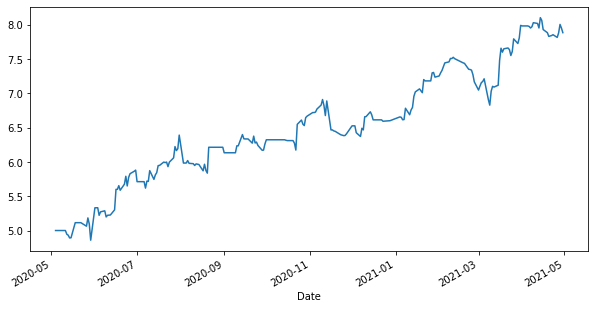

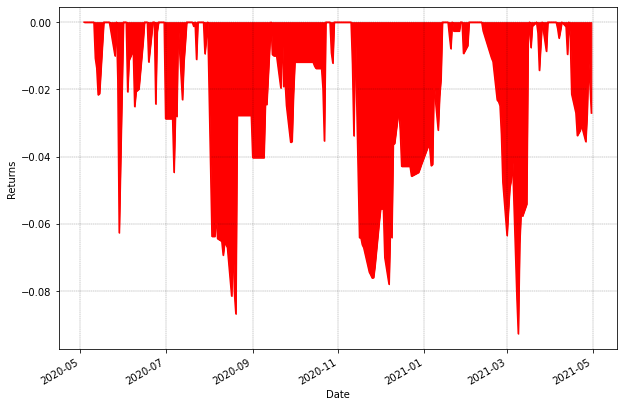

In [14]:

dfPort = pd.DataFrame(portfolioAmtDic)

numPairs = len(dfPort.columns)

initialAmount = pairAmount*numPairs

dfPort['portfolio'] = np.sum(dfPort, axis=1)
dfPort['portfolio_rets'] = dfPort['portfolio'].pct_change()

dd = calc_drawdown_df(dfPort['portfolio'])

pnl = (dfPort['portfolio'].iloc[-1]-initialAmount)/initialAmount

cagr  = (pnl + 1)**(252/len(df))-1

stdDev = dfPort['portfolio_rets'].std()

maxDD = dd.min()

print()
print(f'Porfolio rets: {pnl:.2f} CAGR: {cagr:.2f} StdDev: {stdDev:.2f} Max DrawDown: {maxDD:.2f}')
print()

dfPort['portfolio'].plot(figsize=(10, 5))
plt.show()

plot_drawdown(dd)


# Print Charts

('ARZZ3.SA', 'HGTX3.SA') Cumulative pnl    1.27 The Sharpe Ratio  2.31
('ARZZ3.SA', 'HGTX3.SA') Cumulative ret    1.18 The Sharpe Ratio  2.40


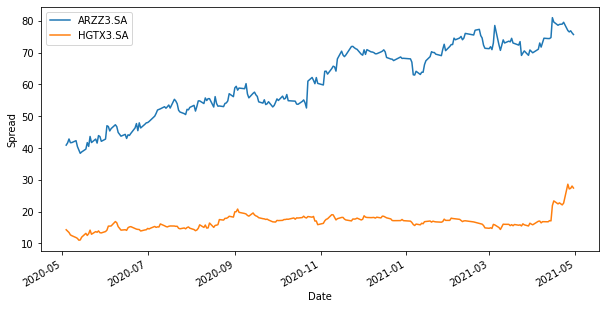

('ARZZ3.SA', 'HGTX3.SA') Cumulative pnl    1.27 The Sharpe Ratio  2.31


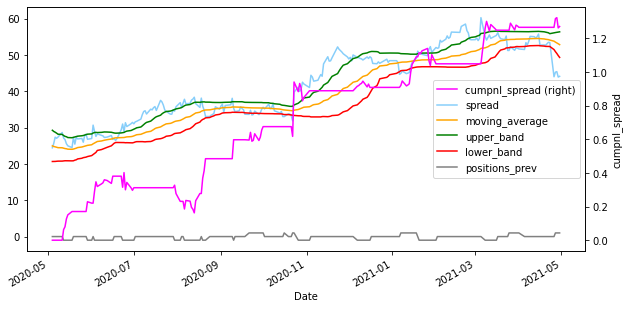

('ARZZ3.SA', 'HGTX3.SA') Cumulative ret    1.18 The Sharpe Ratio  2.40


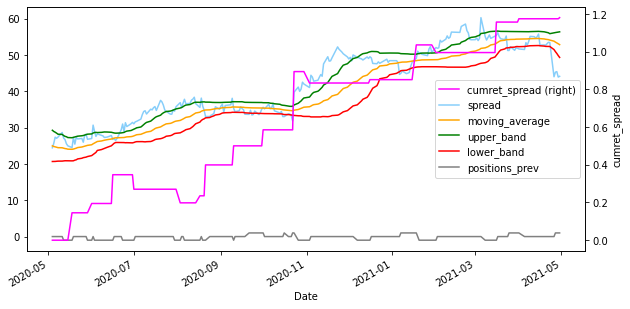

('ARZZ3.SA', 'HGTX3.SA') Cumulative ret    1.18 The Sharpe Ratio  2.40


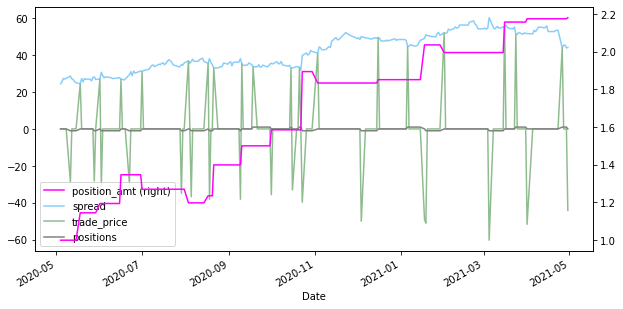

('ARZZ3.SA', 'HGTX3.SA') Cumulative ret    1.18 The Sharpe Ratio  2.40


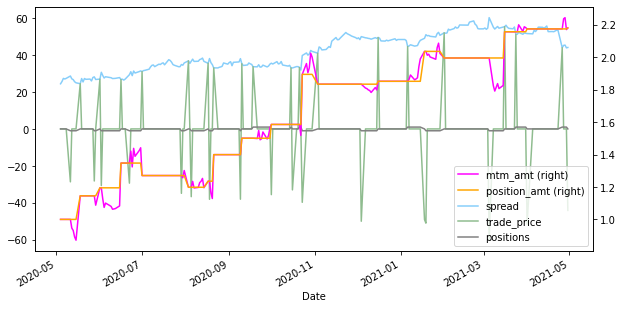

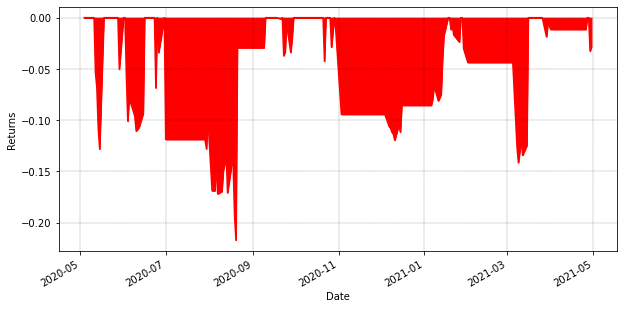

('JHSF3.SA', 'MRVE3.SA') Cumulative pnl    0.65 The Sharpe Ratio  1.64
('JHSF3.SA', 'MRVE3.SA') Cumulative ret    0.70 The Sharpe Ratio  1.89


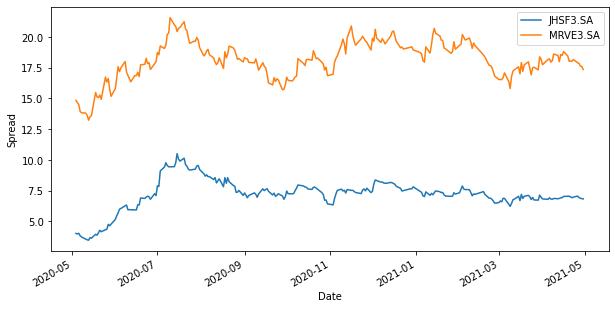

('JHSF3.SA', 'MRVE3.SA') Cumulative pnl    0.65 The Sharpe Ratio  1.64


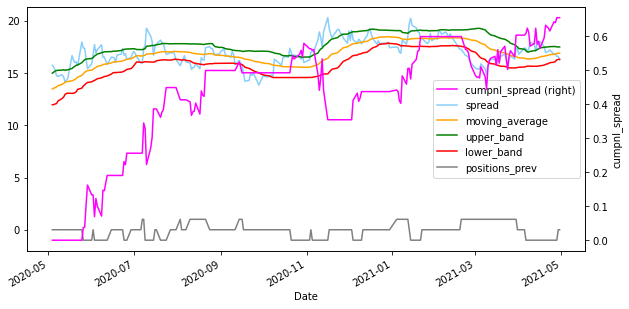

('JHSF3.SA', 'MRVE3.SA') Cumulative ret    0.70 The Sharpe Ratio  1.89


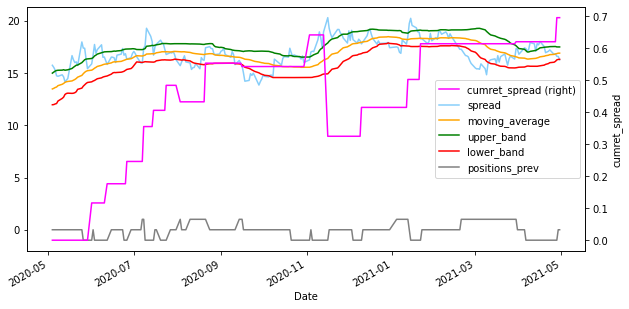

('JHSF3.SA', 'MRVE3.SA') Cumulative ret    0.70 The Sharpe Ratio  1.89


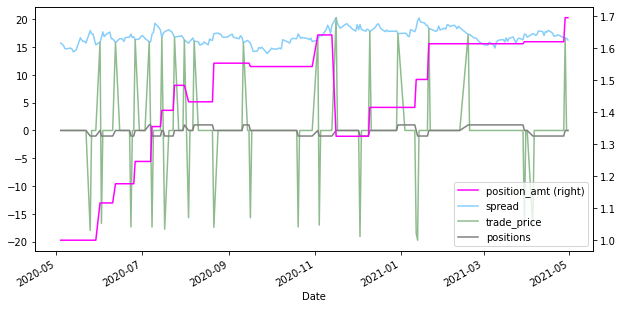

('JHSF3.SA', 'MRVE3.SA') Cumulative ret    0.70 The Sharpe Ratio  1.89


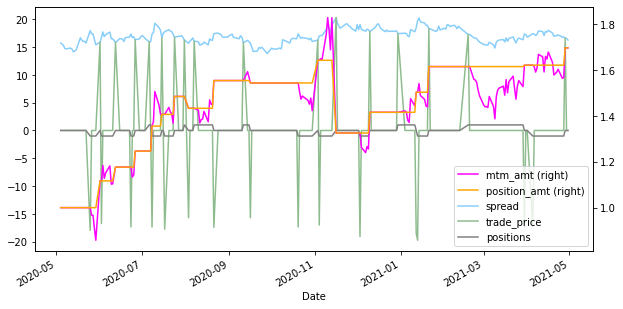

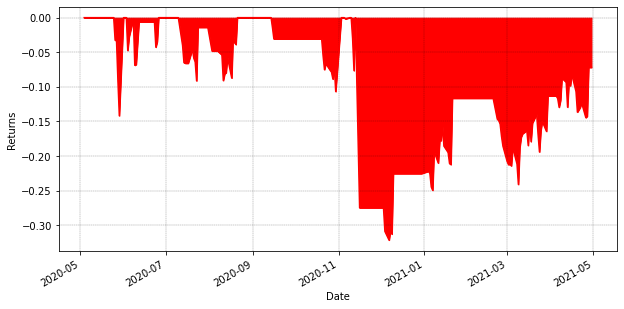

('CMIG4.SA', 'CPFE3.SA') Cumulative pnl    0.46 The Sharpe Ratio  2.29
('CMIG4.SA', 'CPFE3.SA') Cumulative ret    0.56 The Sharpe Ratio  2.34


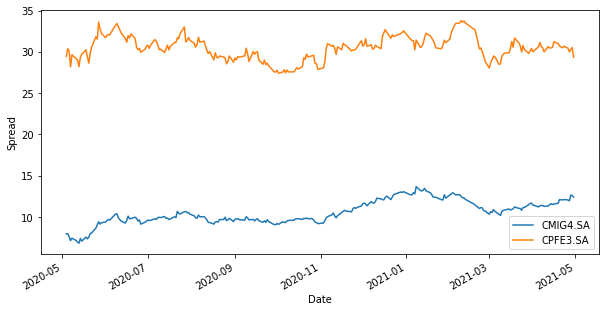

('CMIG4.SA', 'CPFE3.SA') Cumulative pnl    0.46 The Sharpe Ratio  2.29


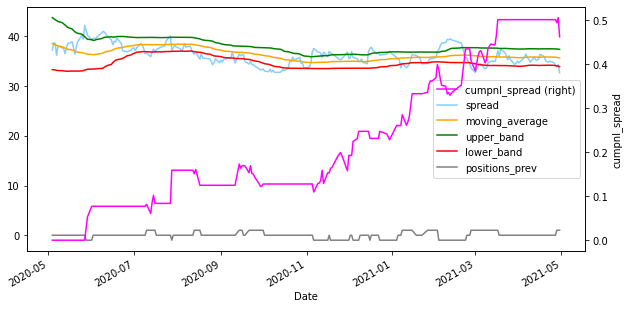

('CMIG4.SA', 'CPFE3.SA') Cumulative ret    0.56 The Sharpe Ratio  2.34


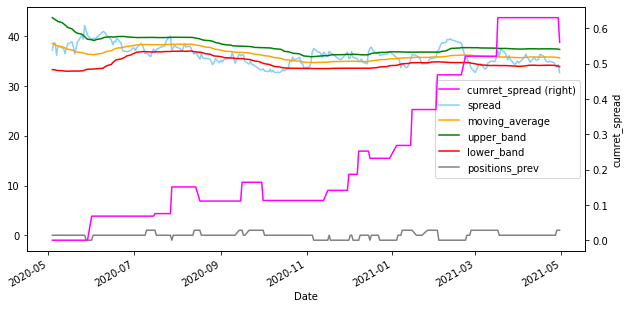

('CMIG4.SA', 'CPFE3.SA') Cumulative ret    0.56 The Sharpe Ratio  2.34


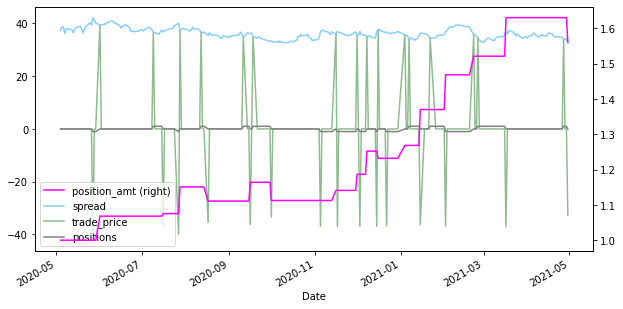

('CMIG4.SA', 'CPFE3.SA') Cumulative ret    0.56 The Sharpe Ratio  2.34


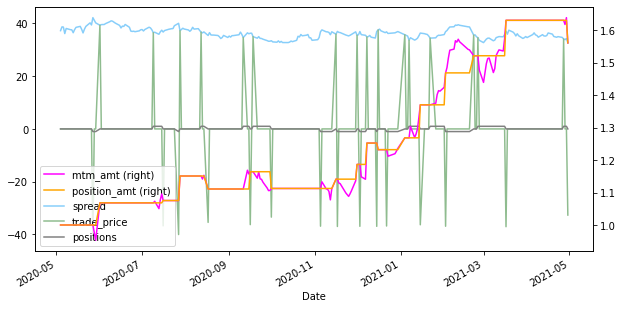

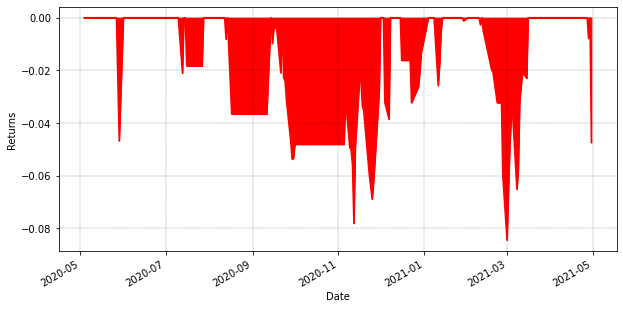

('CPFE3.SA', 'ENBR3.SA') Cumulative pnl    0.32 The Sharpe Ratio  1.21
('CPFE3.SA', 'ENBR3.SA') Cumulative ret    0.35 The Sharpe Ratio  1.76


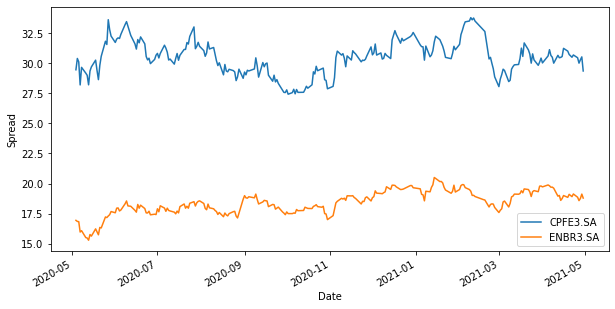

('CPFE3.SA', 'ENBR3.SA') Cumulative pnl    0.32 The Sharpe Ratio  1.21


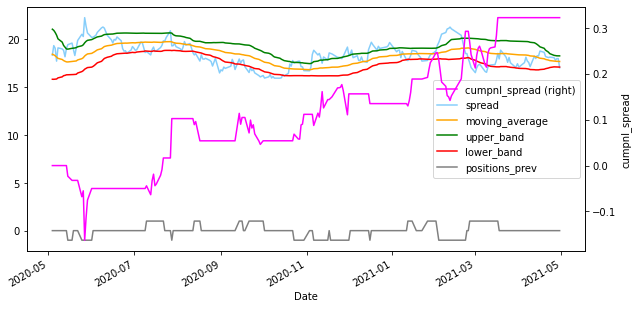

('CPFE3.SA', 'ENBR3.SA') Cumulative ret    0.35 The Sharpe Ratio  1.76


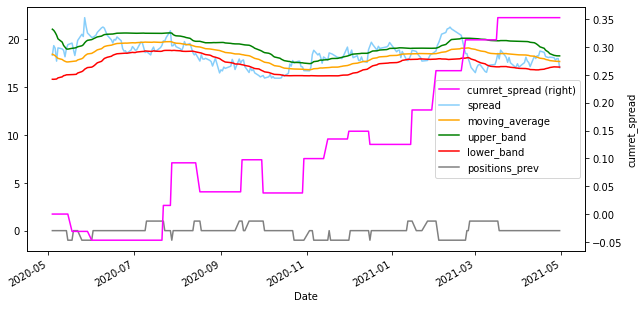

('CPFE3.SA', 'ENBR3.SA') Cumulative ret    0.35 The Sharpe Ratio  1.76


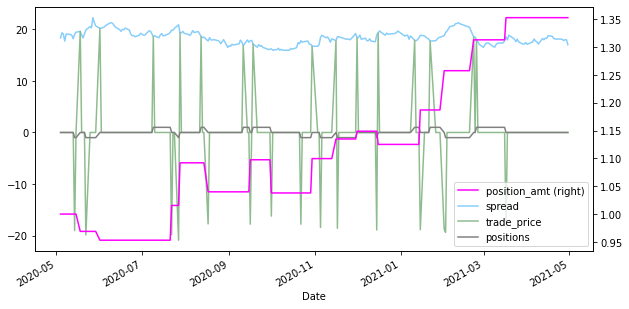

('CPFE3.SA', 'ENBR3.SA') Cumulative ret    0.35 The Sharpe Ratio  1.76


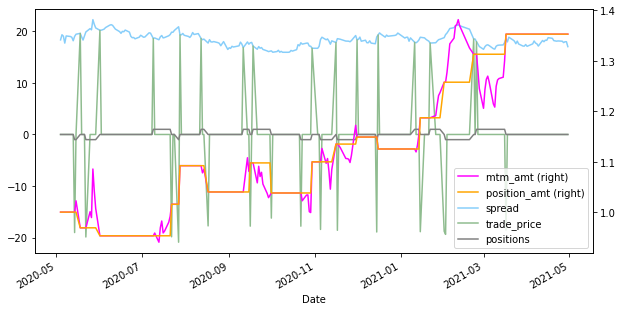

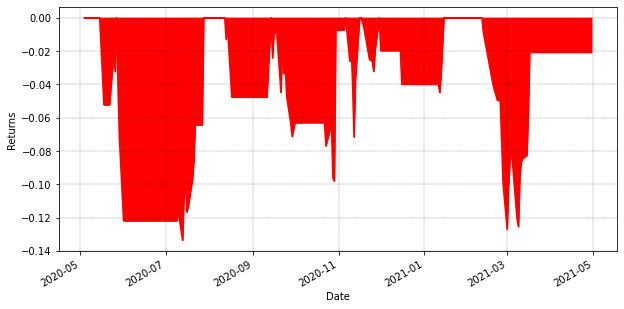

('ENBR3.SA', 'TRPL4.SA') Cumulative pnl    0.17 The Sharpe Ratio  0.30
('ENBR3.SA', 'TRPL4.SA') Cumulative ret    0.09 The Sharpe Ratio  0.47


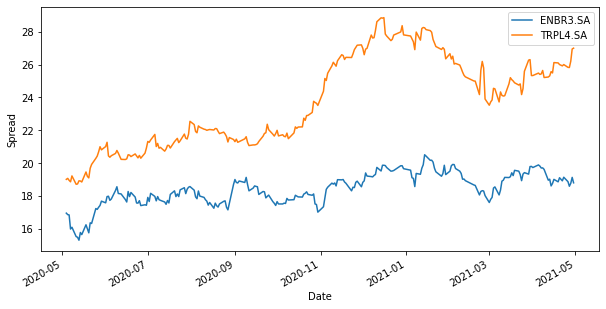

('ENBR3.SA', 'TRPL4.SA') Cumulative pnl    0.17 The Sharpe Ratio  0.30


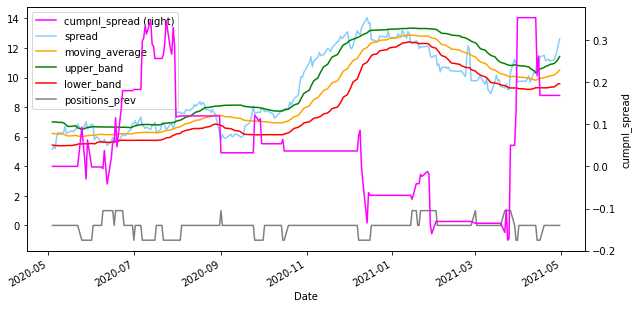

('ENBR3.SA', 'TRPL4.SA') Cumulative ret    0.09 The Sharpe Ratio  0.47


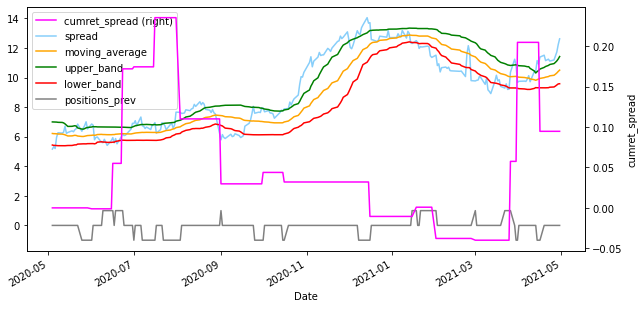

('ENBR3.SA', 'TRPL4.SA') Cumulative ret    0.09 The Sharpe Ratio  0.47


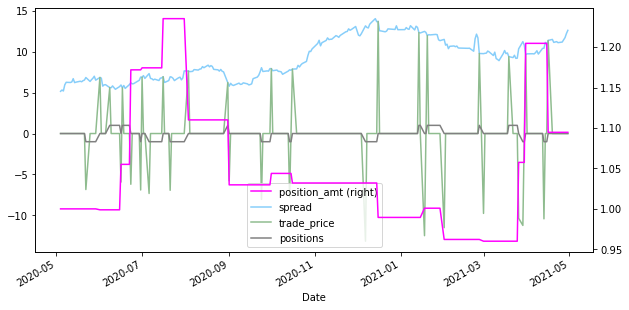

('ENBR3.SA', 'TRPL4.SA') Cumulative ret    0.09 The Sharpe Ratio  0.47


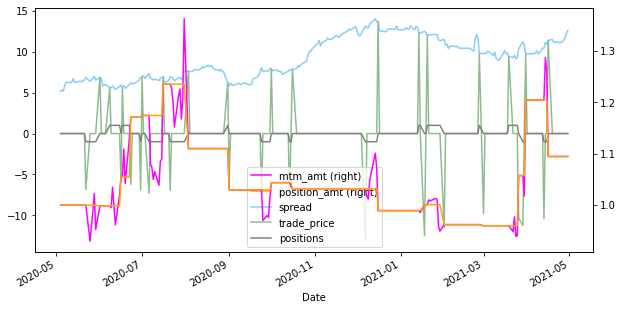

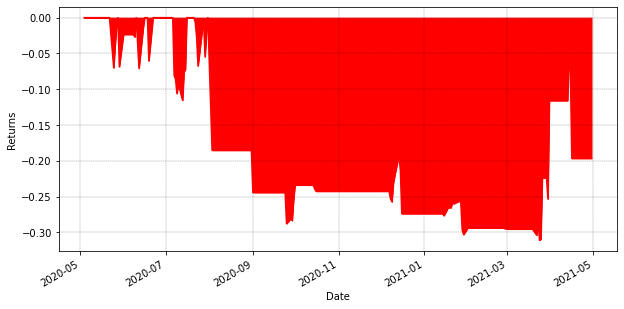

In [15]:
             
w=10
h=5

for pair in bestPairsData:

    df = bestPairsData[pair]
    dd = bestPairsDrawdown[pair]
   
    s = np.mean(df['pnl_spread'])/np.std(df['pnl_spread'])*(252**0.5)
    print(pair, 'Cumulative pnl %7.2f The Sharpe Ratio %5.2f' % (df['cumpnl_spread'].iloc[-1], s))
    sr = (np.mean(df['ret_spread']))/np.std(df['ret_spread'])*(252**0.5)
    print(pair, 'Cumulative ret %7.2f The Sharpe Ratio %5.2f' % (df['cumret_spread'].iloc[-1], sr))

    
    # Plot the spread
    df[[pair[0], pair[1]]].plot(figsize=(w, h)) #, color=['lightskyblue', 'orange', 'green', 'red'])
    plt.ylabel("Spread")
    plt.show()

    print(pair, 'Cumulative pnl %7.2f The Sharpe Ratio %5.2f' % (df['cumpnl_spread'].iloc[-1], s))
    df[['cumpnl_spread', 'spread', 'moving_average', 'upper_band', 'lower_band', 'positions_prev']].plot(figsize=(w, h), color=['fuchsia', 'lightskyblue', 'orange', 'green', 'red', 'gray'], secondary_y='cumpnl_spread')
    plt.ylabel("cumpnl_spread")
    plt.show()

    print(pair, 'Cumulative ret %7.2f The Sharpe Ratio %5.2f' % (df['cumret_spread'].iloc[-1], sr))
    df[['cumret_spread', 'spread', 'moving_average', 'upper_band', 'lower_band', 'positions_prev']].plot(figsize=(w, h), color=['fuchsia', 'lightskyblue', 'orange', 'green', 'red', 'gray'], secondary_y='cumret_spread')
    plt.ylabel("cumret_spread")
    plt.show()

    print(pair, 'Cumulative ret %7.2f The Sharpe Ratio %5.2f' % (df['cumret_spread'].iloc[-1], sr))
    df[['position_amt', 'spread', 'trade_price', 'positions']].plot(figsize=(w, h), color=['fuchsia', 'lightskyblue', 'darkseagreen', 'gray'], secondary_y='position_amt')
    plt.show()
    
    print(pair, 'Cumulative ret %7.2f The Sharpe Ratio %5.2f' % (df['cumret_spread'].iloc[-1], sr))
    df[['mtm_amt', 'position_amt', 'spread', 'trade_price', 'positions']].plot(figsize=(w, h), color=['fuchsia', 'orange', 'lightskyblue', 'darkseagreen', 'gray'], secondary_y=['mtm_amt', 'position_amt'])
    plt.show()
    
    plot_drawdown(dd, w, h)
    

In [ ]:
For complete blog, visit: https://blog.quantinsti.com/statistical-arbitrage-pair-trading-brazil-stock-market-project-luiz-guedes